scikit-image
---

In [33]:
from skimage import data, io, transform
import plotly
import plotly.express as px
import numpy as np
import pooch

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('dark_background')
matplotlib.rcParams['font.size'] = 12

[https://scikit-image.org/docs/dev/auto_examples/](https://scikit-image.org/docs/dev/auto_examples/)

In [2]:
img_data = data.cells3d()

In [3]:
img_data.shape

(60, 2, 256, 256)


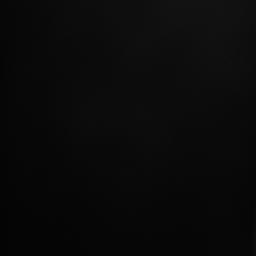
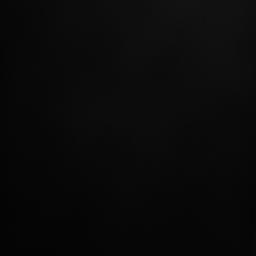
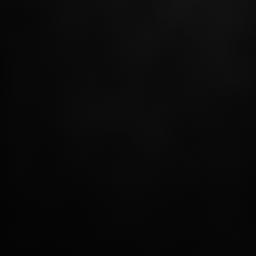
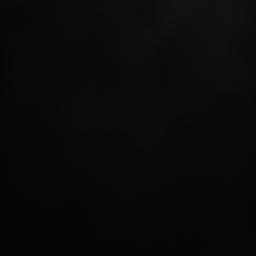
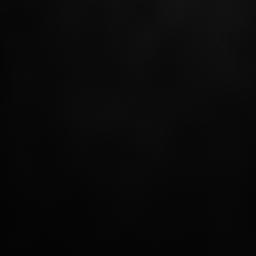
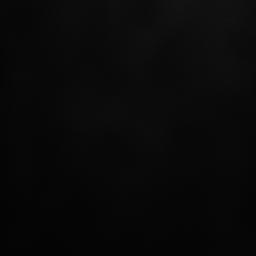
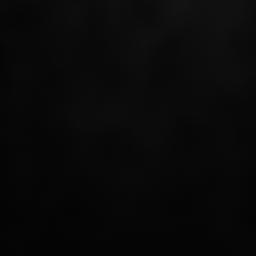
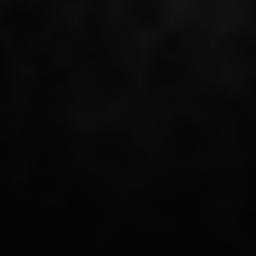
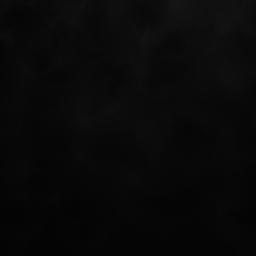
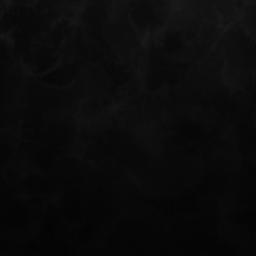
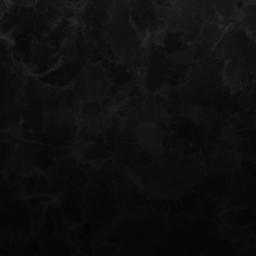
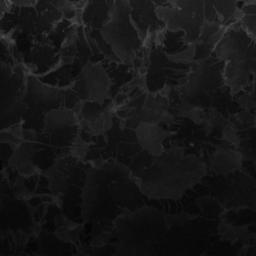
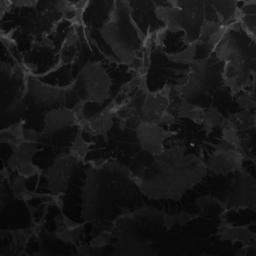
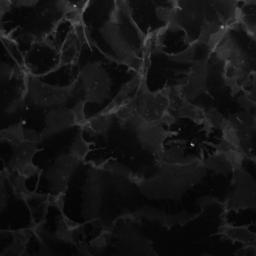
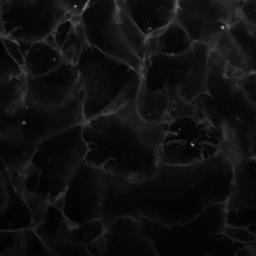
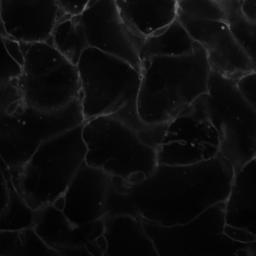
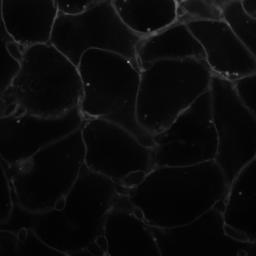
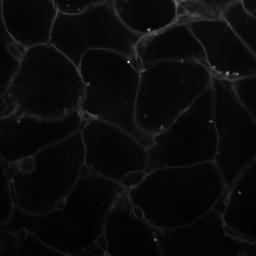
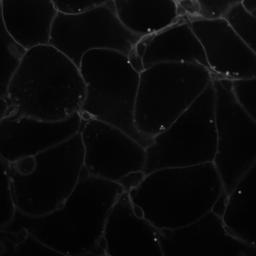
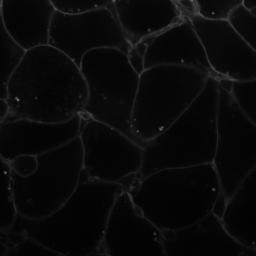
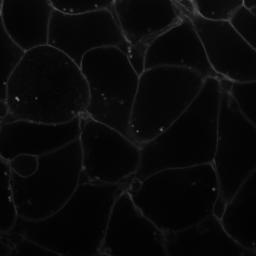
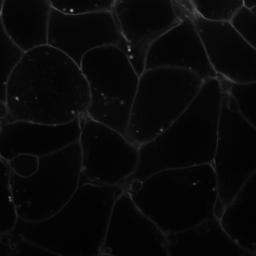
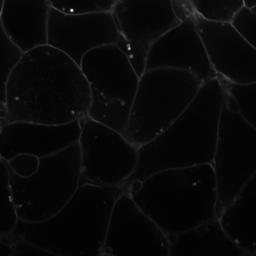
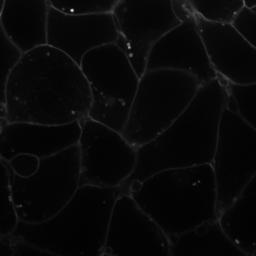
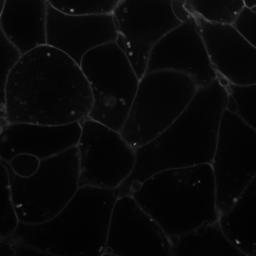
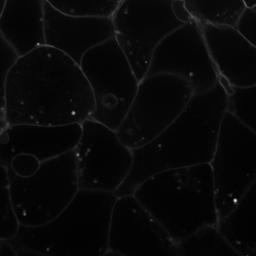
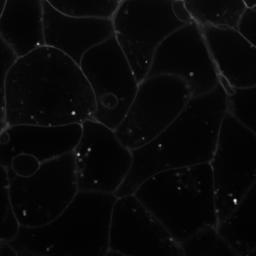
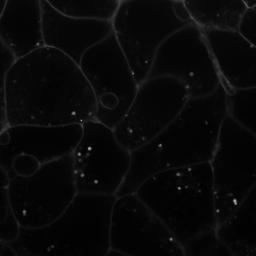
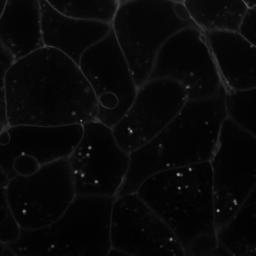
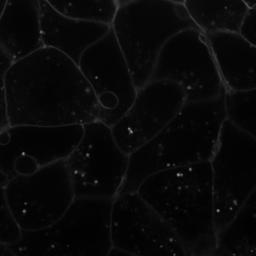
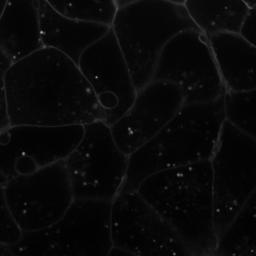
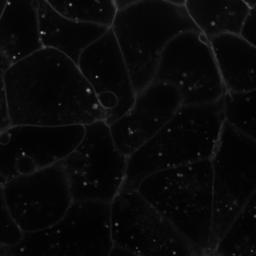
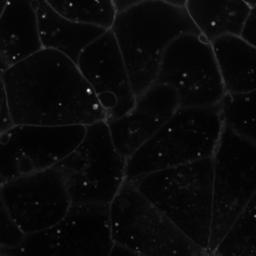
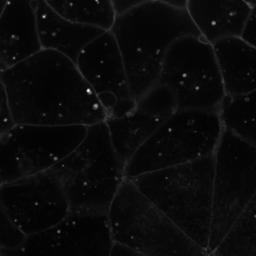
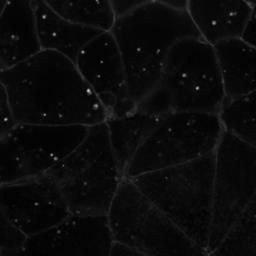
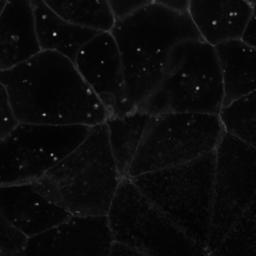
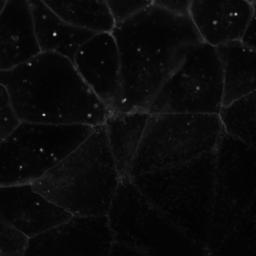
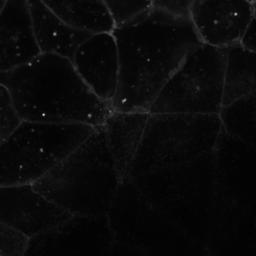
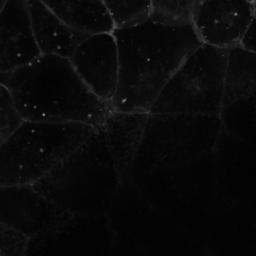
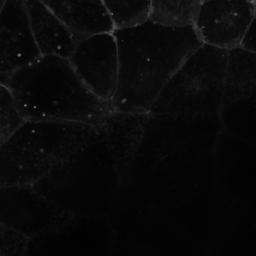
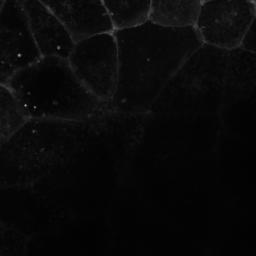
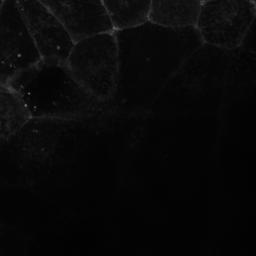
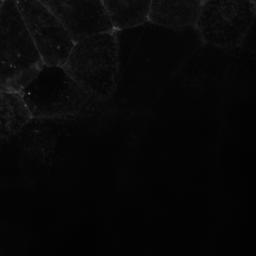
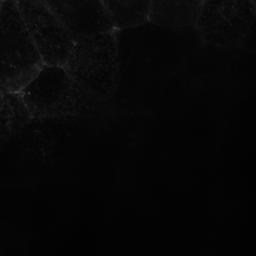
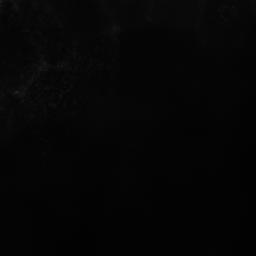
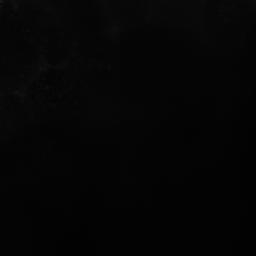
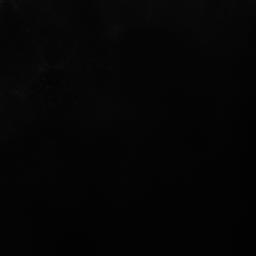
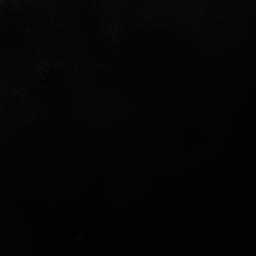

In [4]:
fig = px.imshow(
    img_data[:,0,:,:],
    animation_frame = 0,
    binary_string = True,
    binary_format='jpg',    
)
plotly.io.show(fig)


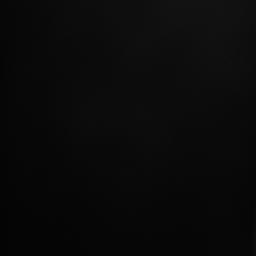
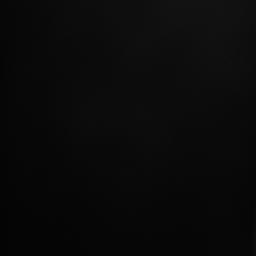
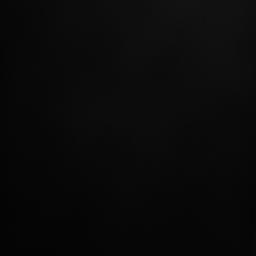
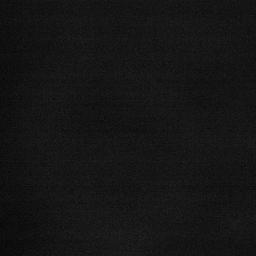
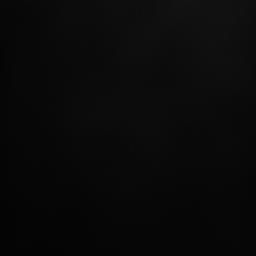
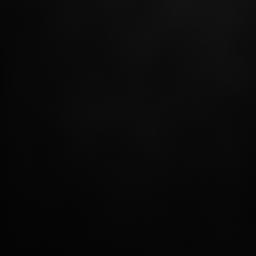
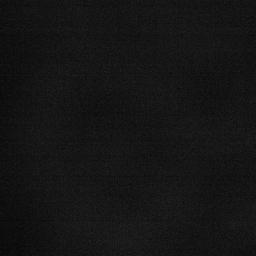
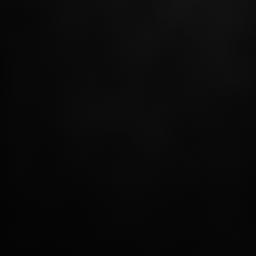
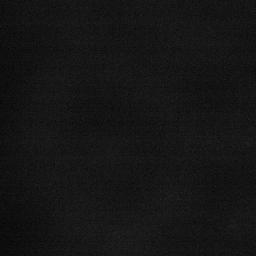
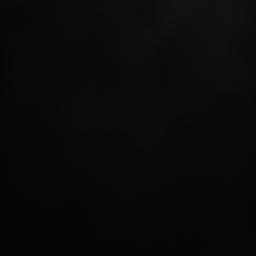
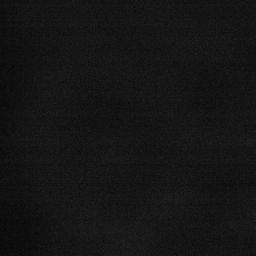
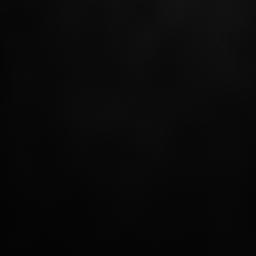
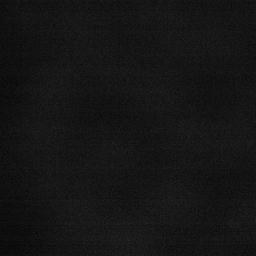
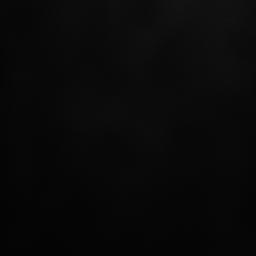
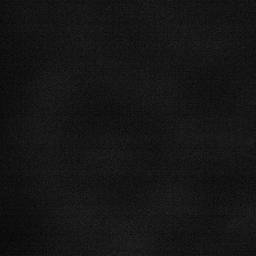
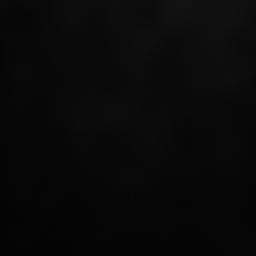
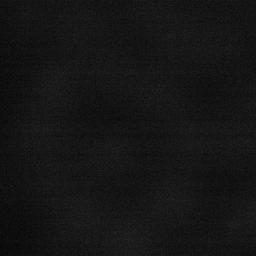
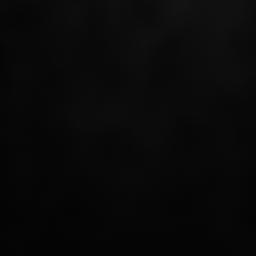
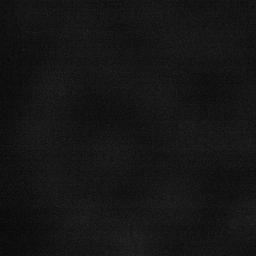
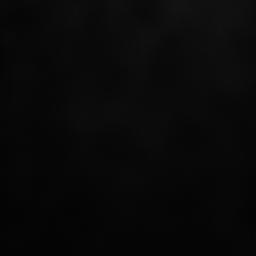
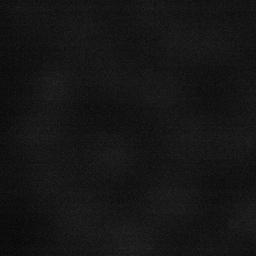
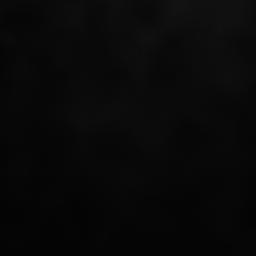
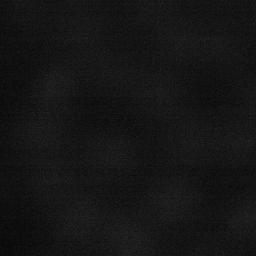
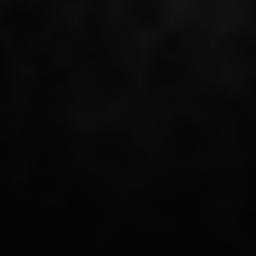
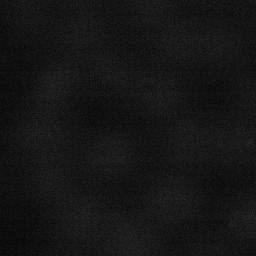
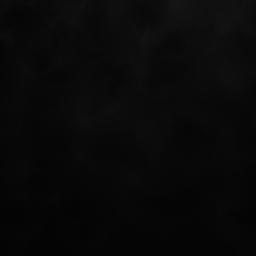
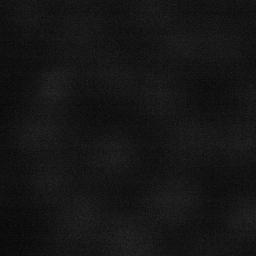
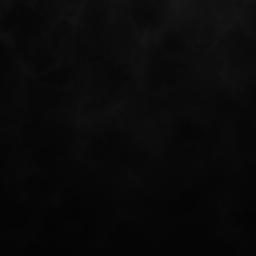
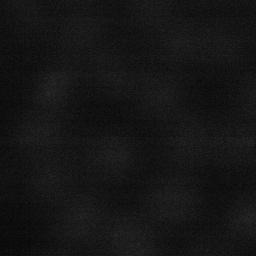
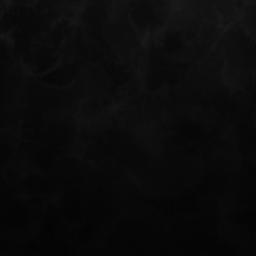
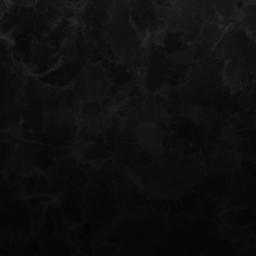
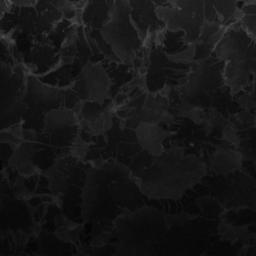
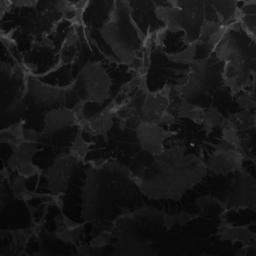
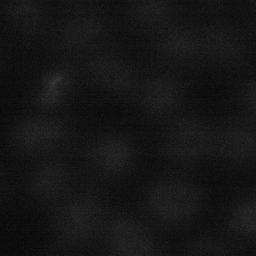
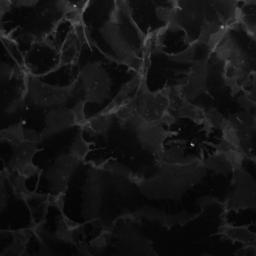
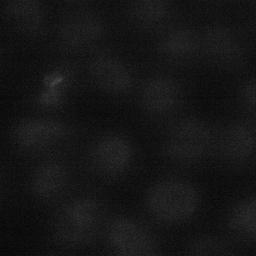
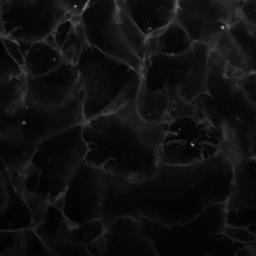
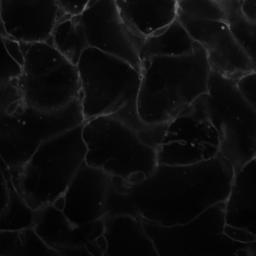
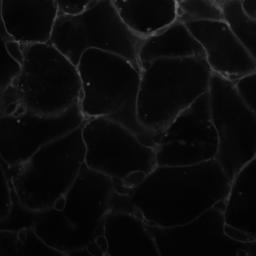
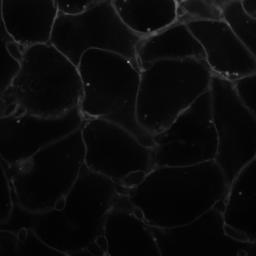
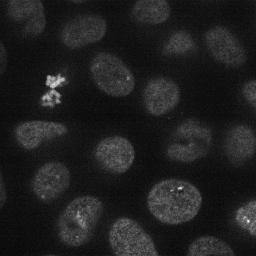
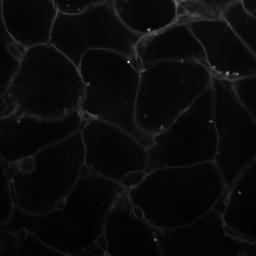
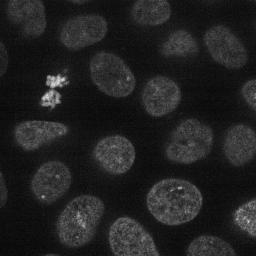
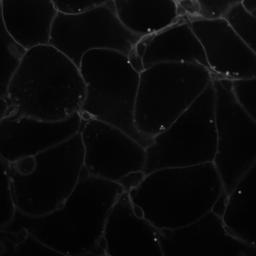
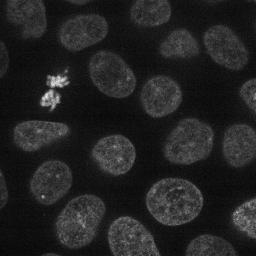
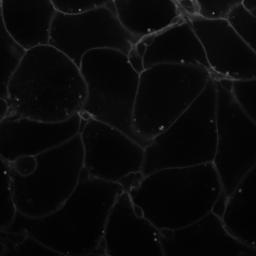
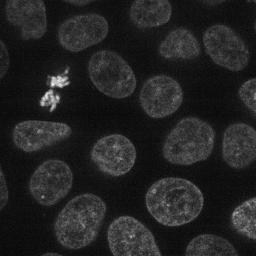
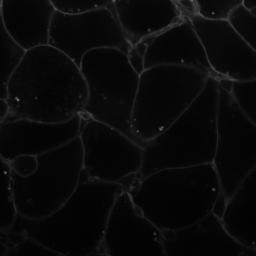
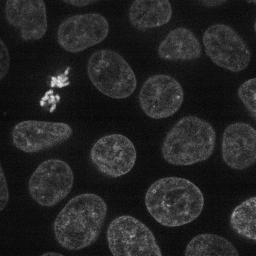
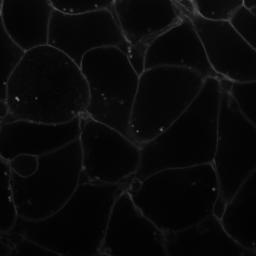
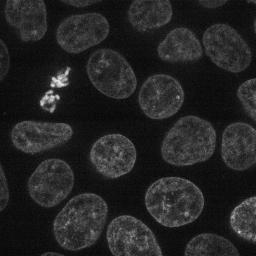
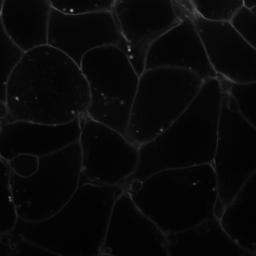
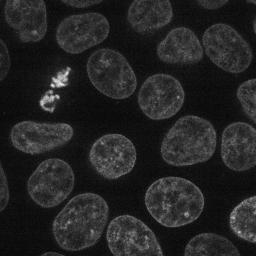
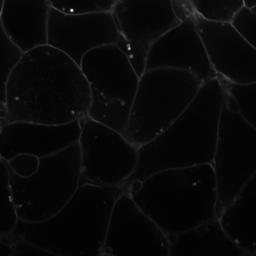
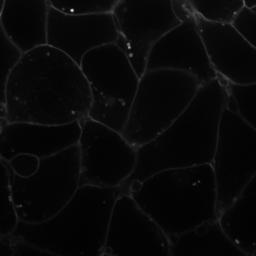
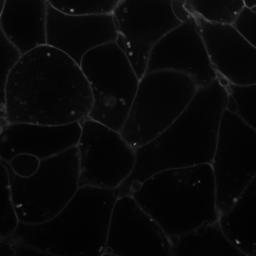
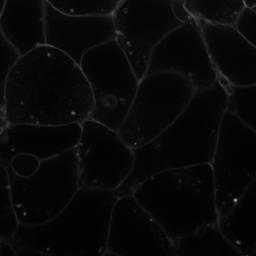
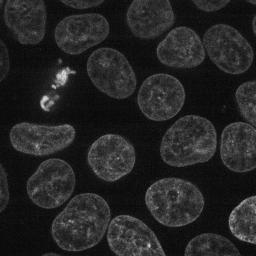
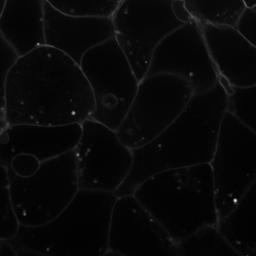
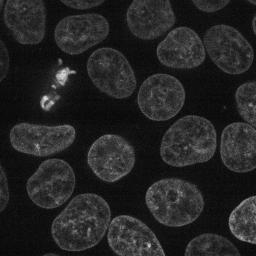
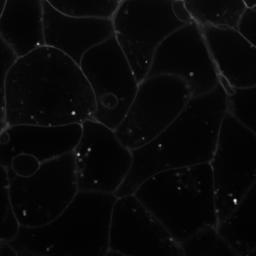
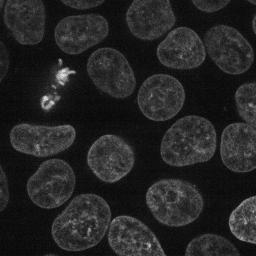
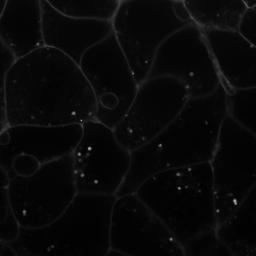
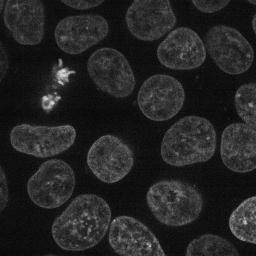
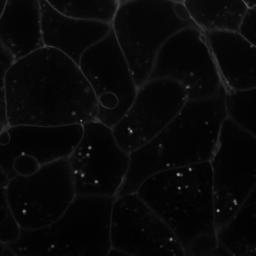
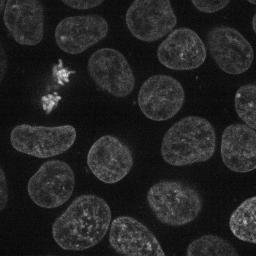
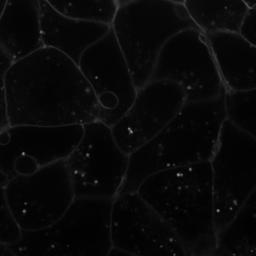
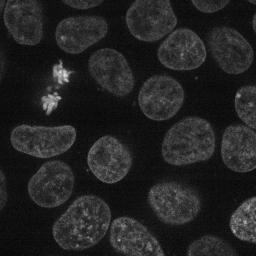
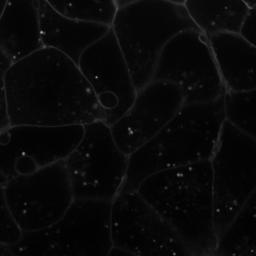
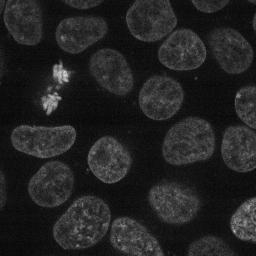
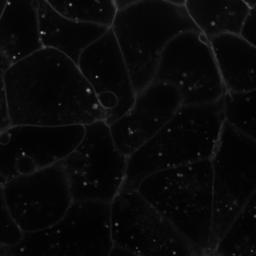
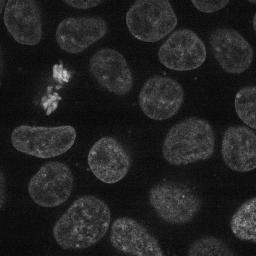
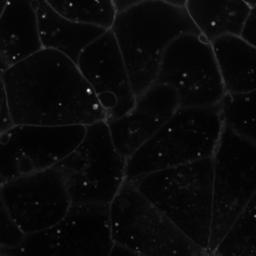
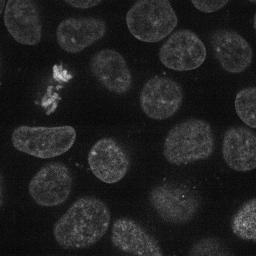
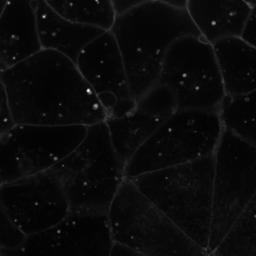
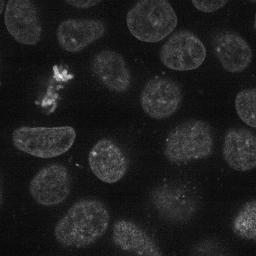
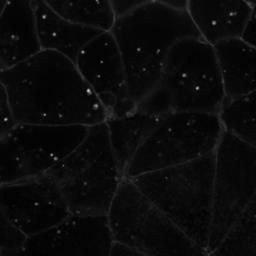
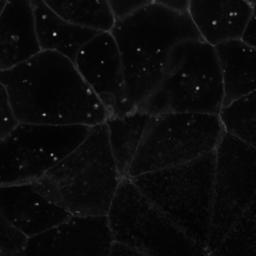
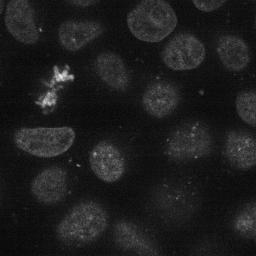
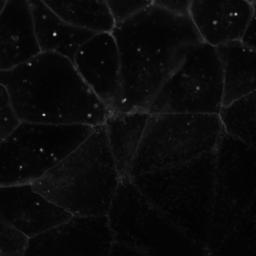
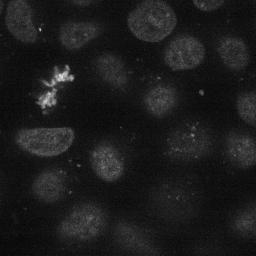
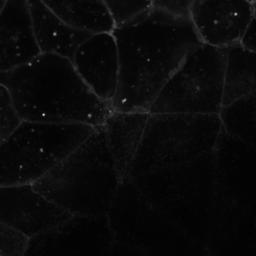
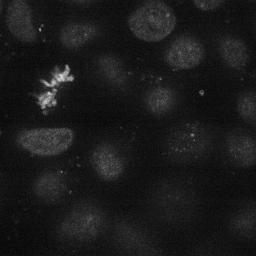
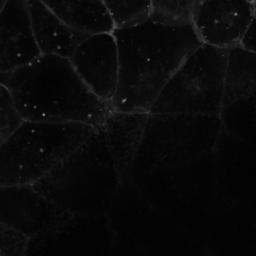
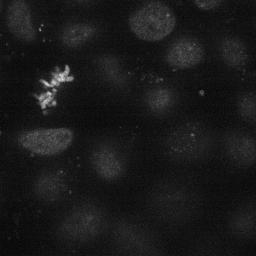
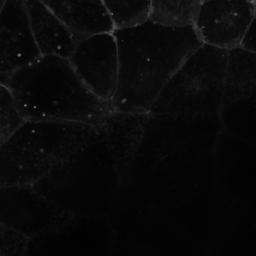
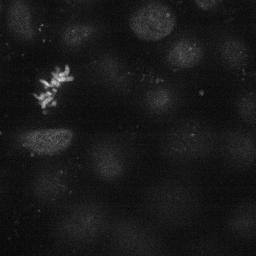
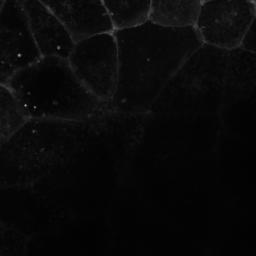
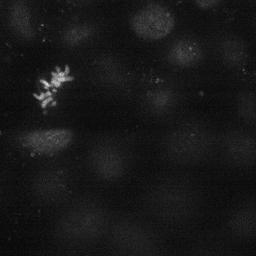
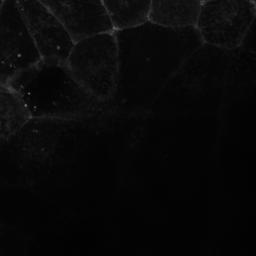
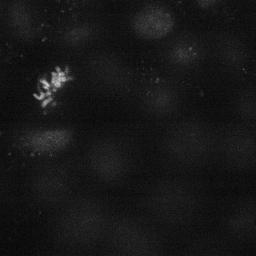
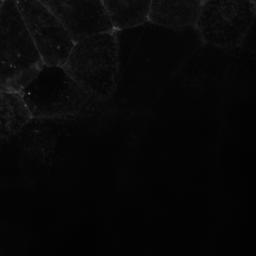
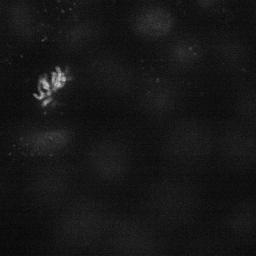
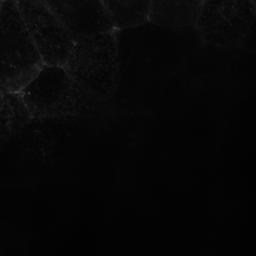
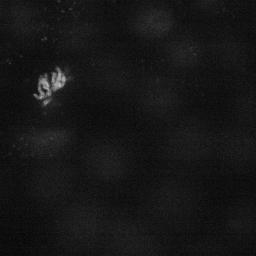
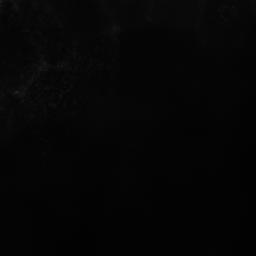
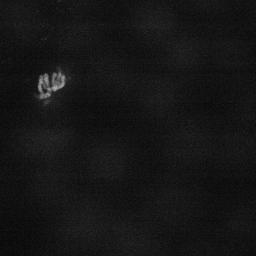
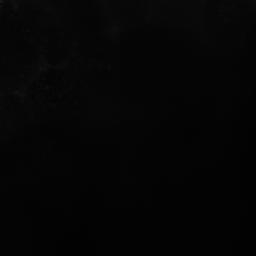
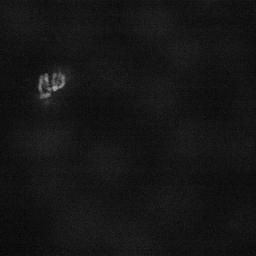
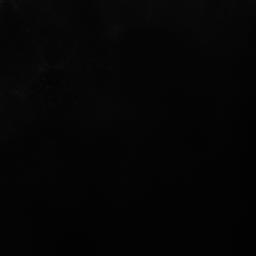
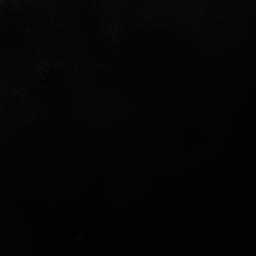
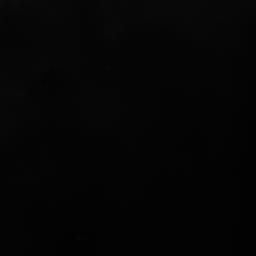

In [5]:
fig = px.imshow(
    img_data[:,:,:,:],
    facet_col= 1,
    animation_frame = 0,
    binary_string = True,
    binary_format='jpg',    
)
plotly.io.show(fig)

[General-purpose images](https://scikit-image.org/docs/dev/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py)

In [17]:
image_names = ('astronaut',
          'binary_blobs',
          'brick',
          'colorwheel',
          'camera',
          'cat',
          'checkerboard',
          'clock',
          'coffee',
          'coins',
          'eagle',
          'grass',
          'gravel',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )

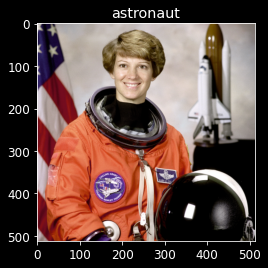

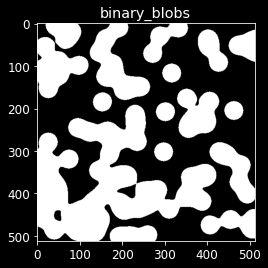

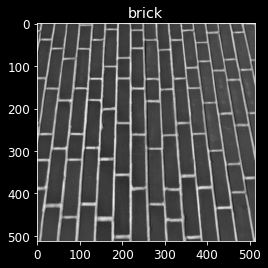

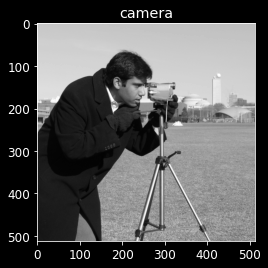

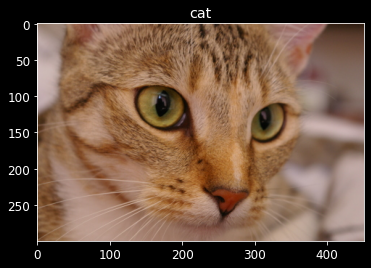

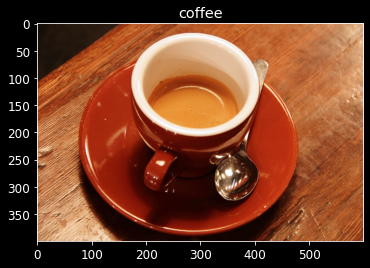

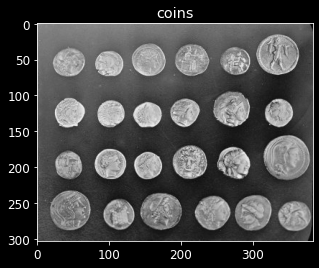

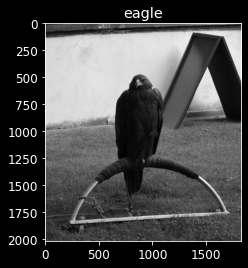

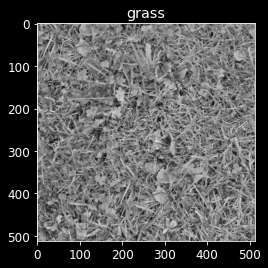

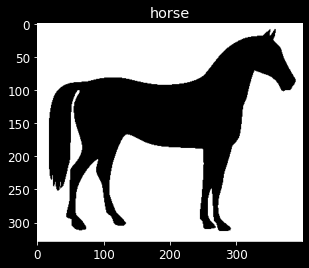

In [25]:
#download images
images = []
for name in image_names:
    caller = getattr(data,name)
    image = caller()
    images.append([name, image])

#show each image
for image in images:
    plt.figure()
    plt.title(image[0])
    if image[1].ndim == 2:
        plt.imshow(image[1], cmap = plt.cm.gray)
    else:
        plt.imshow(image[1])
plt.show()

In [26]:
# shape of the astronaut image
images[0][1].shape

(512, 512, 3)

In [27]:
sci_image_names = ('hubble_deep_field',
          'immunohistochemistry',
          'lily',
          'microaneurysms',
          'moon',
          'retina',
          'shepp_logan_phantom',
          'skin',
          'cell',
          'human_mitosis',
          )

for name in sci_image_names:
    caller = getattr(data, name)
    image = caller()
    images.append([name, image])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


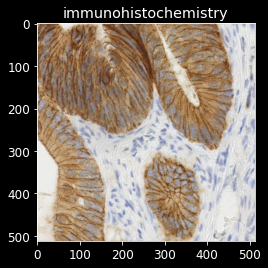

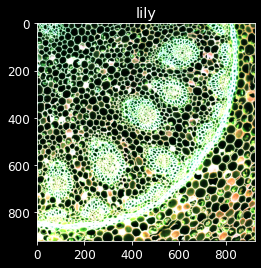

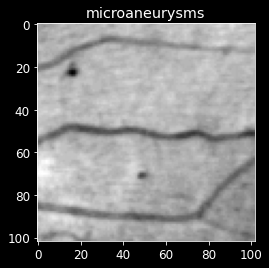

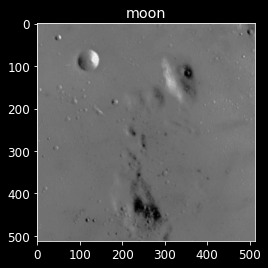

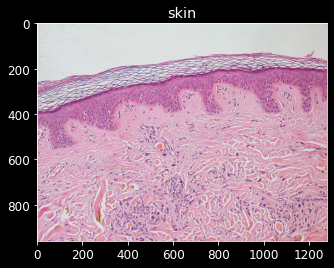

In [28]:
for image in images[len(image_names)+1:]:
    plt.figure()
    plt.title(image[0])
    if image[1].ndim == 2:
        plt.imshow(image[1], cmap = plt.cm.gray)
    else:
        plt.imshow(image[1])

In [29]:
3*3*3*2

54

In [30]:
_*3/2

81.0

### Transforming

[['astronaut',
  array([[[154, 147, 151],
          [109, 103, 124],
          [ 63,  58, 102],
          ...,
          [127, 120, 115],
          [120, 117, 106],
          [125, 119, 110]],
  
         [[177, 171, 171],
          [144, 141, 143],
          [113, 114, 124],
          ...,
          [127, 118, 112],
          [124, 115, 108],
          [121, 116, 105]],
  
         [[201, 194, 193],
          [182, 178, 175],
          [168, 165, 164],
          ...,
          [128, 120, 117],
          [126, 116, 112],
          [124, 114, 109]],
  
         ...,
  
         [[186, 170, 176],
          [186, 170, 177],
          [183, 168, 170],
          ...,
          [  0,   0,   0],
          [  0,   0,   1],
          [  0,   0,   0]],
  
         [[183, 169, 170],
          [182, 167, 171],
          [185, 164, 176],
          ...,
          [  0,   0,   1],
          [  1,   1,   1],
          [  0,   0,   0]],
  
         [[184, 167, 172],
          [183, 165, 169],
         

In [46]:
#create a transform
tform = transform.EuclideanTransform(
    rotation = np.pi/5.,
    translation = (50,26)
)
print(tform.params)

[[ 0.80901699 -0.58778525 50.        ]
 [ 0.58778525  0.80901699 26.        ]
 [ 0.          0.          1.        ]]


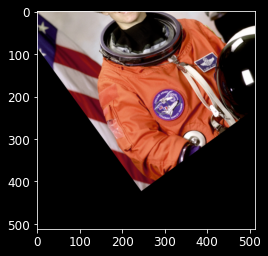

In [42]:
#apply transform then show
tf_astronaut = transform.warp(images[0][1], tform);
plt.imshow(tf_astronaut)

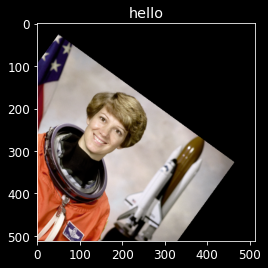

In [45]:
# find the input to a transform given the output (apply inverse)
tf_astronaut = transform.warp(images[0][1], tform.inverse);
plt.imshow(tf_astronaut)
plt.title('hello');

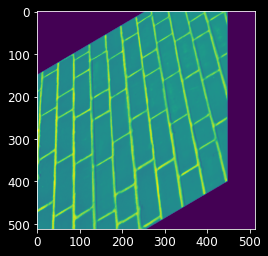

In [79]:
my_affine = transform.AffineTransform(shear = -np.pi/5,
                                     rotation = np.pi/5,
                                     translation=[150,-150])
affined_image = transform.warp(images[2][1], my_affine)
plt.imshow(affined_image);